In [1]:
%run modeling-functions.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm
from scipy import stats

stud_df = pd.ExcelFile('datastud.xlsx')
table = stud_df.parse('Результаты')
t_stud = table.copy()
t_stud = t_stud.iloc[:, [0,1,2,3,11]]
t_empty = t_stud.dropna(subset = ['Оценка студента (опрос)'])

stud_df_update = pd.ExcelFile('t_stud_new.xlsx')
table_update = stud_df_update.parse('Результаты')
if set(['Unnamed: 0']).issubset(table_update.columns):
        table_update.drop('Unnamed: 0', axis = 1, inplace = True)
t_empty_update = table_update.dropna(subset = ['Оценка студента (опрос)'])

stud_df_sep = pd.ExcelFile('t_stud_separate.xlsx')
table_sep = stud_df_sep.parse('Результаты')
if set(['Unnamed: 0']).issubset(table_sep.columns):
        table_sep.drop('Unnamed: 0', axis = 1, inplace = True)
t_empty_sep = table_sep.dropna(subset = ['Оценка студента (опрос)'])


In [65]:
df_ = t_empty.loc[:,t_empty.columns.isin(['Оценка студента (опрос)','Дисциплина'])].groupby(['Дисциплина']).mean()
#df_upd = t_empty_update.loc[:,t_empty.columns.isin(['Оценка студента (опрос)','Дисциплина'])].groupby(['Дисциплина']).mean()
df_sep = t_empty_sep.loc[:,t_empty.columns.isin(['Оценка студента (опрос)','Дисциплина'])].groupby(['Дисциплина']).mean()


In [66]:
#df_upd.sort_values(by = 'Оценка студента (опрос)', ascending = False)

In [67]:
df_sep.sort_values(by = ['Оценка студента (опрос)'], ascending = False)

,Оценка студента (опрос)
Дисциплина,
53,5.000000
91,4.983333
24,4.980198
21,4.940000
59,4.940000
11,4.936000
68,4.936000
107,4.936000
25,4.916000


In [68]:
merge_df = df_.merge(df_sep, on="Дисциплина", suffixes=('_до', '_после'))
#merge_df = merge_df.merge(df_upd, on="Дисциплина", suffixes=('_до', '_после', '_upd'))
merge_df

,Оценка студента (опрос)_до,Оценка студента (опрос)_после
Дисциплина,,
4,4.071667,4.200000
9,4.589640,4.900000
11,4.708333,4.936000
14,4.618280,4.785000
18,4.124595,4.652000
21,4.573333,4.940000
24,4.651958,4.980198
25,4.782514,4.916000
34,4.602732,4.572000


In [69]:
merge_df['Квадрат разности оценок'] = (merge_df['Оценка студента (опрос)_до'] - merge_df['Оценка студента (опрос)_после']) ** 2

#merge_df['Квадрат разности_1_3'] = (merge_df['Оценка студента (опрос)_до'] - merge_df['Оценка студента (опрос)']) ** 2
#merge_df['Квадрат разности_2_3'] = (merge_df['Оценка студента (опрос)_после'] - merge_df['Оценка студента (опрос)']) ** 2
merge_df

,Оценка студента (опрос)_до,Оценка студента (опрос)_после,Квадрат разности оценок
Дисциплина,,,
4,4.071667,4.200000,0.016469
9,4.589640,4.900000,0.096324
11,4.708333,4.936000,0.051832
14,4.618280,4.785000,0.027796
18,4.124595,4.652000,0.278156
21,4.573333,4.940000,0.134444
24,4.651958,4.980198,0.107742
25,4.782514,4.916000,0.017819
34,4.602732,4.572000,0.000944


In [71]:
merge_df['Квадрат разности оценок'].sum()/len(merge_df['Квадрат разности оценок'])

0.0866102288556098

In [72]:
merge_df['Разность'].sum()/len(merge_df['Разность'])

KeyError: 'Разность'

In [61]:
izmen_data = merge_df
izmen_data.sort_values(by = ['Оценка студента (опрос)'], ascending = False, inplace = True)
izmen_data.reset_index(inplace=True)
izmen_data

,Дисциплина,Оценка студента (опрос)_до,Оценка студента (опрос)_после,Оценка студента (опрос),Квадрат разности_1_2,Квадрат разности_1_3,Квадрат разности_2_3
0,25,4.782514,4.916000,4.789498,0.017819,4.877703e-05,0.016003
1,107,4.745902,4.936000,4.768919,0.036137,5.297952e-04,0.027916
2,45,4.742063,4.804000,4.740625,0.003836,2.069259e-06,0.004016
3,88,4.747917,4.794444,4.738835,0.002165,8.247755e-05,0.003092
4,11,4.708333,4.936000,4.727066,0.051832,3.508951e-04,0.043654
5,64,4.695195,4.893421,4.724123,0.039293,8.368067e-04,0.028662
6,114,4.631313,4.908000,4.716340,0.076556,7.229546e-03,0.036734
7,59,4.649573,4.940000,4.696528,0.084348,2.204784e-03,0.059279
8,43,4.680729,4.902632,4.685926,0.049241,2.700631e-05,0.046961
9,24,4.651958,4.980198,4.672718,0.107742,4.310018e-04,0.094544


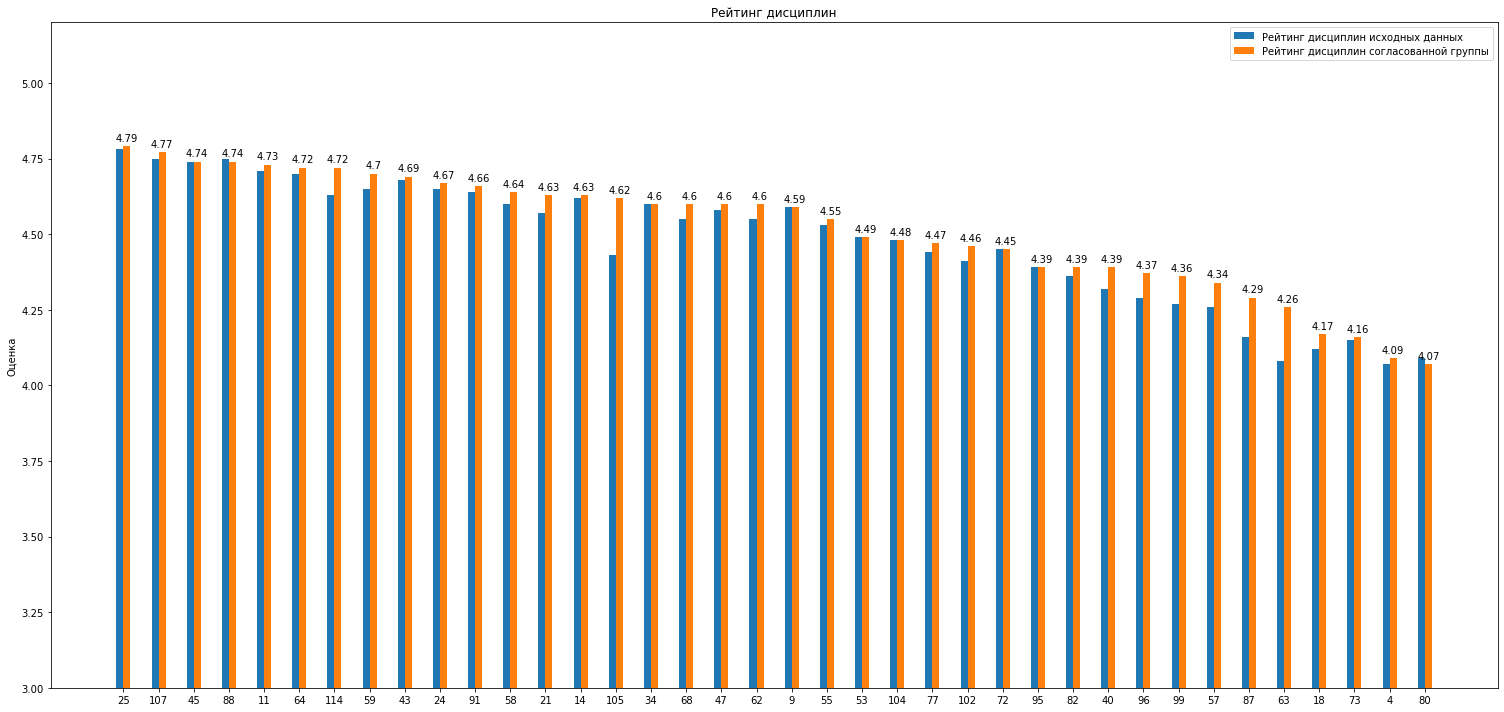

In [63]:
labels = izmen_data['Дисциплина'].round(1).to_list()
men_means = izmen_data['Оценка студента (опрос)_до'].round(2).to_list()
women_means = izmen_data['Оценка студента (опрос)'].round(2).to_list()

x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(21,10))
rects1 = ax.bar(x - width/2, men_means, width, label='Рейтинг дисциплин исходных данных')
rects2 = ax.bar(x + width/2, women_means, width, label='Рейтинг дисциплин согласованной группы')

ax.set(ylabel='Оценка', ylim=(3, 5.2))
ax.set_title('Рейтинг дисциплин')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)


fig.tight_layout()

plt.show()

In [ ]:
#izmen_data.sort_values(by = ['Квадрат разности'], ascending = False, inplace = True)

labels = izmen_data['Дисциплина'].round(1).to_list()
men_means = izmen_data['Квадрат разности'].round(2).to_list()


x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(21,10))
rects1 = ax.bar(x - width/2, men_means, width, label='Рейтинг дисциплин после заполнения пропусков')

ax.set(ylabel='Оценка', ylim=(0, 1))
ax.set_title('Рейтинг дисциплин')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()

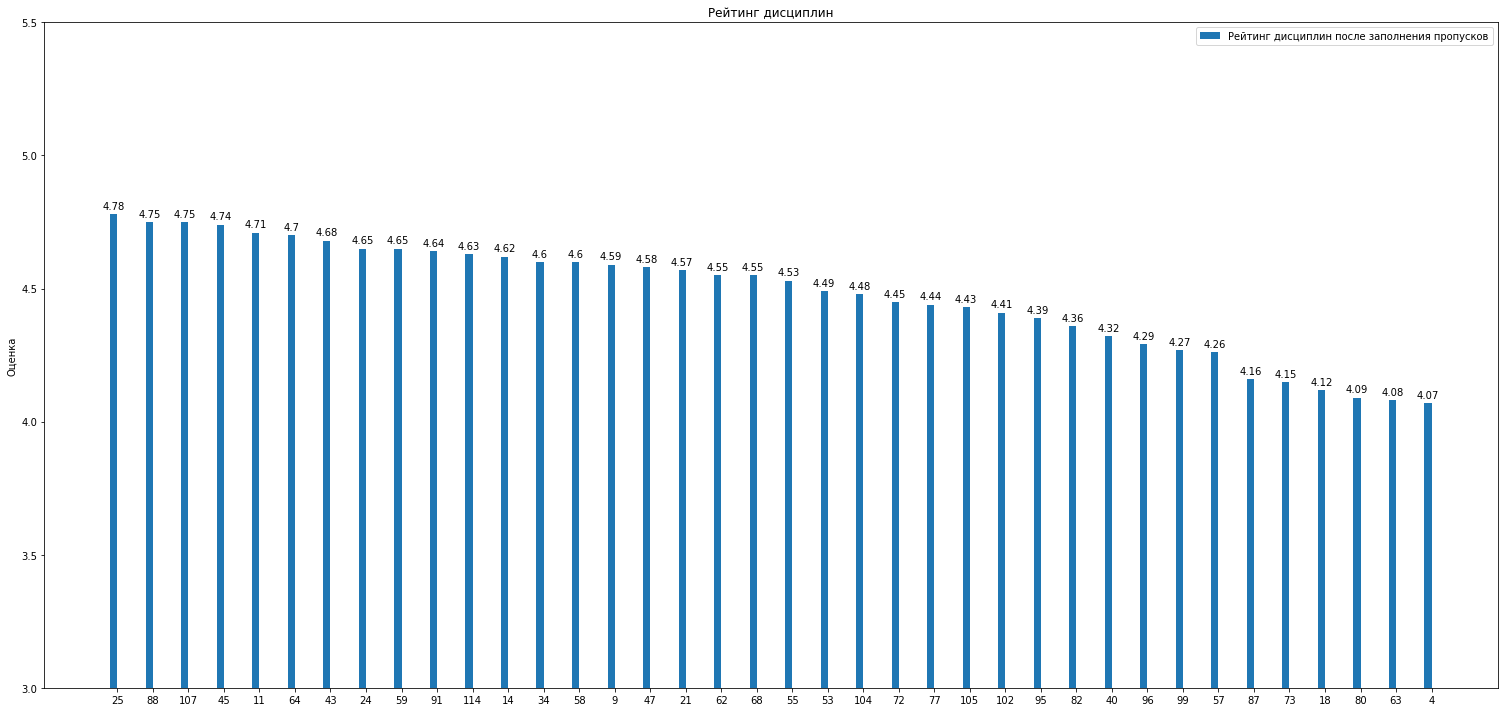

In [28]:
izmen_data.sort_values(by = ['Оценка студента (опрос)_до'], ascending = False, inplace = True)
labels = izmen_data['Дисциплина'].round(1).to_list()
men_means = izmen_data['Оценка студента (опрос)_до'].round(2).to_list()

x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(21,10))
rects1 = ax.bar(x - width/2, men_means, width, label='Рейтинг дисциплин после заполнения пропусков')

ax.set(ylabel='Оценка', ylim=(3, 5.5))
ax.set_title('Рейтинг дисциплин')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()

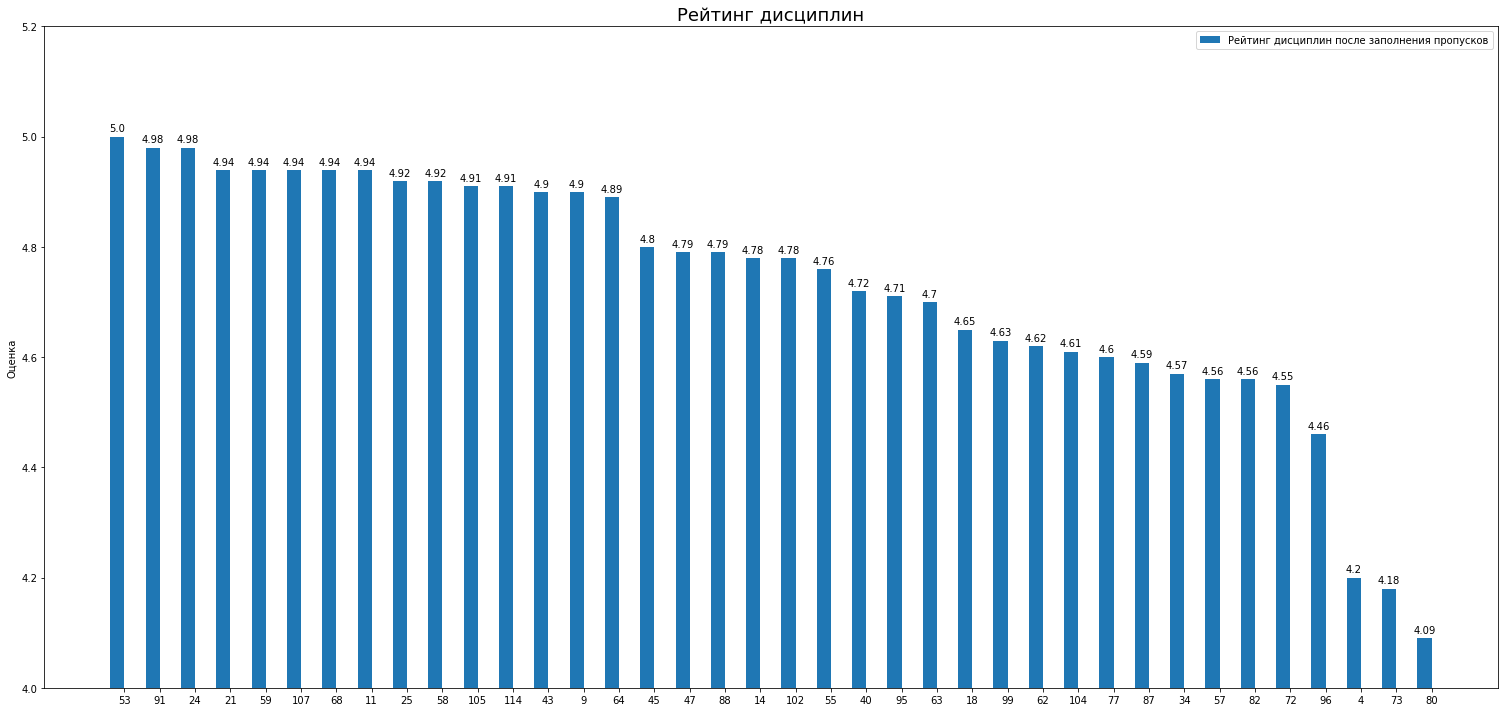

In [39]:
izmen_data.sort_values(by = ['Оценка студента (опрос)_после'], ascending = False, inplace = True)
labels = izmen_data['Дисциплина'].round(1).to_list()
men_means = izmen_data['Оценка студента (опрос)_после'].round(2).to_list()

x = np.arange(len(labels)) 
width = 0.4  

fig, ax = plt.subplots(figsize=(21,10))
rects1 = ax.bar(x - width/2, men_means, width, label='Рейтинг дисциплин после заполнения пропусков')

ax.set(ylabel='Оценка', ylim=(4, 5.2))
ax.set_title('Рейтинг дисциплин', fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()

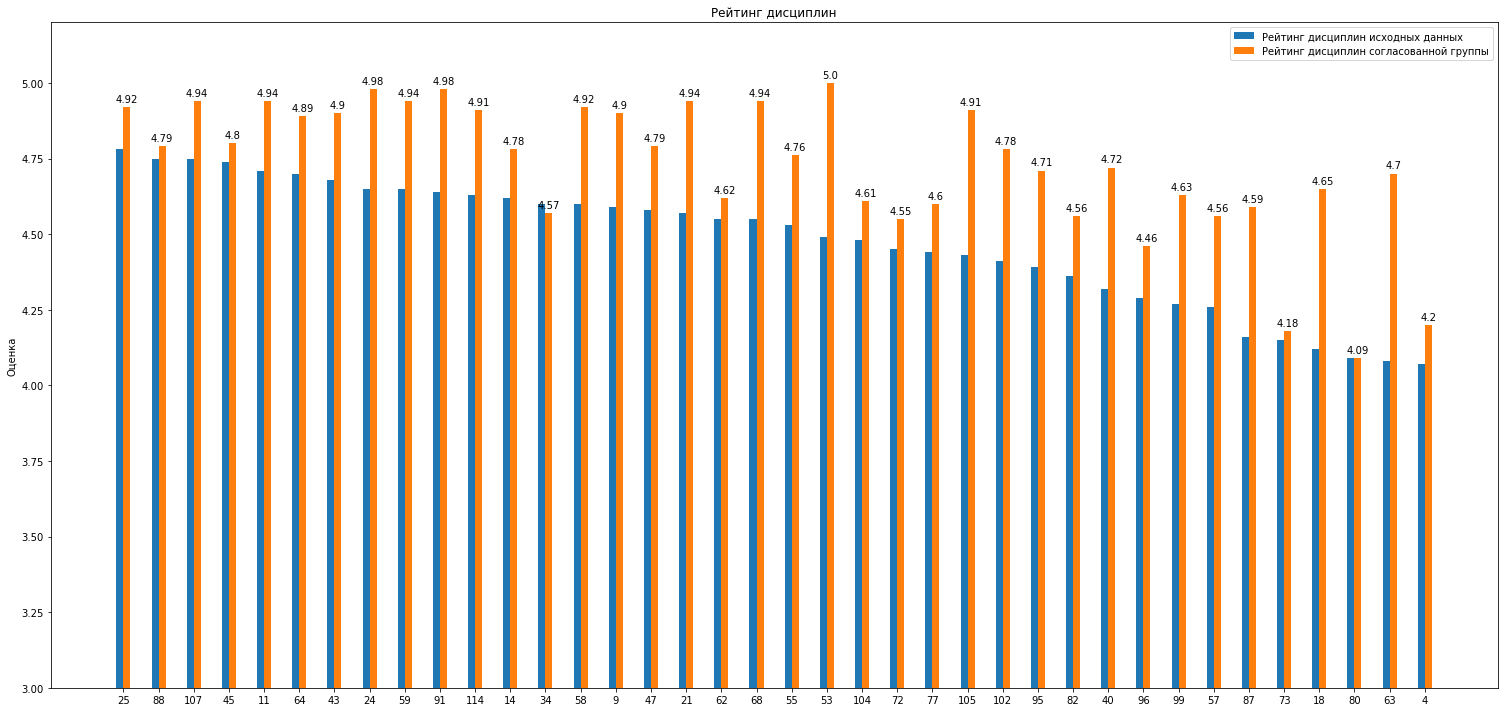

In [41]:
izmen_data.sort_values(by = ['Оценка студента (опрос)_до'], ascending = False, inplace = True)
labels = izmen_data['Дисциплина'].round(1).to_list()
men_means = izmen_data['Оценка студента (опрос)_до'].round(2).to_list()
women_means = izmen_data['Оценка студента (опрос)_после'].round(2).to_list()

x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(21,10))
rects1 = ax.bar(x - width/2, men_means, width, label='Рейтинг дисциплин исходных данных')
rects2 = ax.bar(x + width/2, women_means, width, label='Рейтинг дисциплин согласованной группы')

ax.set(ylabel='Оценка', ylim=(3, 5.2))
ax.set_title('Рейтинг дисциплин')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)


fig.tight_layout()

plt.show()

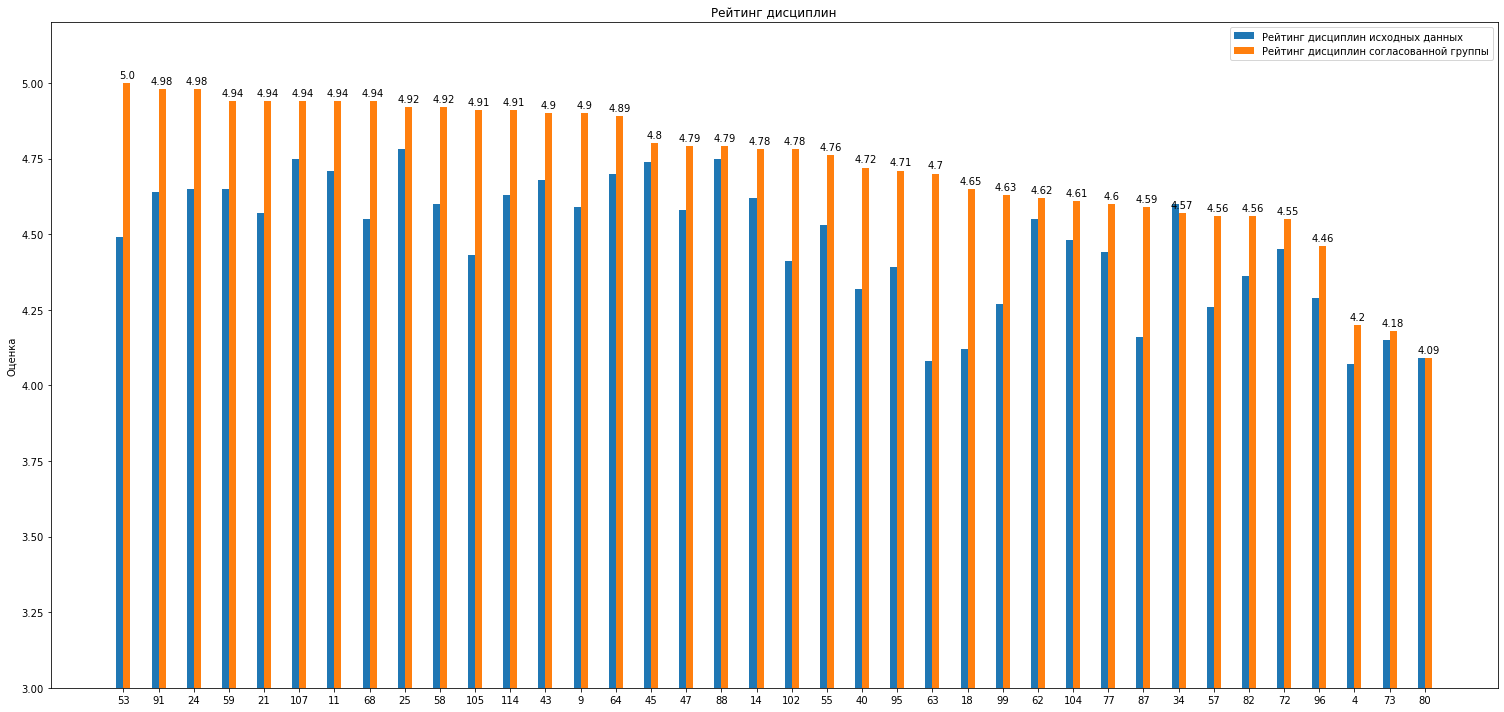

In [64]:
izmen_data.sort_values(by = ['Оценка студента (опрос)_'], ascending = False, inplace = True)
labels = izmen_data['Дисциплина'].round(1).to_list()
men_means = izmen_data['Оценка студента (опрос)_до'].round(2).to_list()
women_means = izmen_data['Оценка студента (опрос)_после'].round(2).to_list()

x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(21,10))
rects1 = ax.bar(x - width/2, men_means, width, label='Рейтинг дисциплин исходных данных')
rects2 = ax.bar(x + width/2, women_means, width, label='Рейтинг дисциплин согласованной группы')

ax.set(ylabel='Оценка', ylim=(3, 5.2))
ax.set_title('Рейтинг дисциплин')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)


fig.tight_layout()

plt.show()